# FINAL PROJECT
## 18/06/2024
## M.Abdirisak.A

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


In [3]:
# loading the dataset
df=pd.read_csv('housing.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# data types of each column
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Drop the columns "id" and "Unnamed: 0"
df.drop(columns=['id', 'Unnamed: 0'], axis=1, inplace=True)

# Obtain a statistical summary
summary = df.describe()

# Display the summary
print(summary)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [8]:
# Count unique floor values and convert to DataFrame
floor_counts = df['floors'].value_counts().to_frame(name='count')

# Display the result
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


<Figure size 100x100 with 0 Axes>

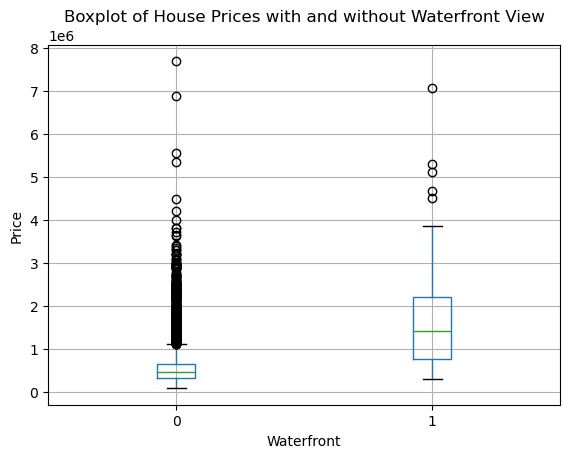

In [9]:
# Create the boxplot
plt.figure(figsize=(1,1))
df.boxplot(column='price', by='waterfront')
plt.title('Boxplot of House Prices with and without Waterfront View')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

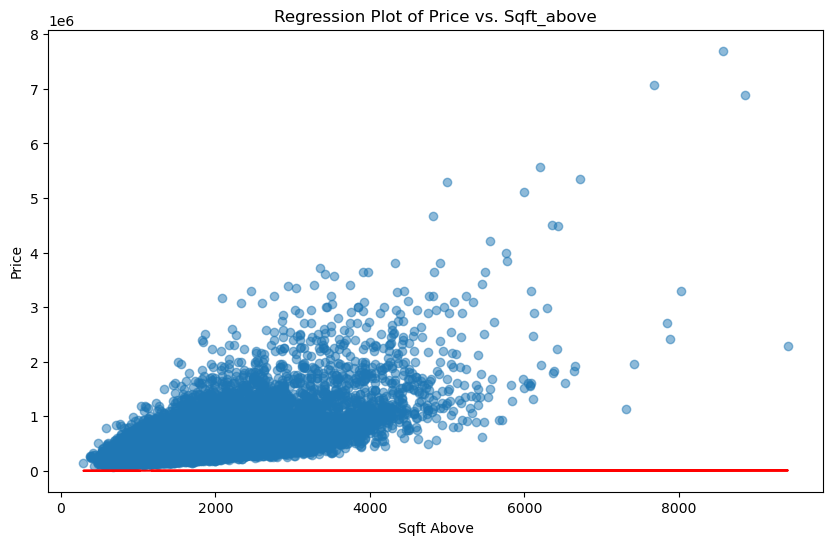

In [10]:
# Create the regression plot
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_above'], df['price'], alpha=0.5)
plt.plot(df['sqft_above'], df['sqft_above'] * df[['sqft_above', 'price']].corr().iloc[0,1], color='red')
plt.title('Regression Plot of Price vs. Sqft_above')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.show()

In [21]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [23]:
# Calculate means
mean_bedrooms = df['bedrooms'].mean()
mean_bathrooms = df['bathrooms'].mean()

# Impute missing values with means
df['bedrooms'].fillna(mean_bedrooms, inplace=True)
df['bathrooms'].fillna(mean_bathrooms, inplace=True)

# Drop any remaining rows with NaN (though there shouldn't be any if you've imputed properly)
df.dropna(inplace=True)

# Print the updated DataFrame
print(df)

                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      20141013T000000  221900.0       3.0       1.00         1180      5650   
1      20141209T000000  538000.0       3.0       2.25         2570      7242   
2      20150225T000000  180000.0       2.0       1.00          770     10000   
3      20141209T000000  604000.0       4.0       3.00         1960      5000   
4      20150218T000000  510000.0       3.0       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
21608  20140521T000000  360000.0       3.0       2.50         1530      1131   
21609  20150223T000000  400000.0       4.0       2.50         2310      5813   
21610  20140623T000000  402101.0       2.0       0.75         1020      1350   
21611  20150116T000000  400000.0       3.0       2.50         1600      2388   
21612  20141015T000000  325000.0       2.0       0.75         1020      1076   

       floors  waterfront  view  condit

C:\Users\abdir\AppData\Local\Temp\ipykernel_22416\1761306368.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(mean_bedrooms, inplace=True)
C:\Users\abdir\AppData\Local\Temp\ipykernel_22416\1761306368.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [24]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
# Define the feature and the target variable
X = df[['sqft_living']]
y = df['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

# Print the R-squared value
print(f'R-squared: {r2}')

R-squared: 0.4928532179037931


In [29]:
# Define the features and the target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_imputed, y)

#  R-squared
r2 = model.score(X_imputed, y)
print("The r_squared value is:  ",r2)


The r_squared value is:   0.6576938081642033


In [30]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: Scale the data
    ('poly_features', PolynomialFeatures(degree=2)),  # Step 2: Create polynomial features
    ('linear_regression', LinearRegression())  # Step 3: Fit a linear regression model
])

# Fit the pipeline
pipeline.fit(X, y)

# Calculate R^2
y_pred = pipeline.predict(X)
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.7513416952187594


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression object
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Calculate R^2 score using the test data
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (Ridge): {r2}')

R-squared (Ridge): 0.6613982983090939


In [33]:
# Perform polynomial transformation (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression object
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

# Calculate R^2 score using the test data
y_pred = ridge.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (Ridge with Polynomial Features): {r2}')

R-squared (Ridge with Polynomial Features): 0.7000720069970313
